<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">
    
This kernel is the continuation of **[30 Days of EDA](https://www.kaggle.com/discussions/general/442602)** learning series.

If you are new here, you might want to check out the 
    
- **[30 days of EDA - Week I](https://www.kaggle.com/code/prasad22/30-days-of-eda-week-i)**. 
- **[30 days of EDA - Week II](https://www.kaggle.com/code/prasad22/30-days-of-eda-week-ii)**.     
    
This notebook will focus upon exploring data through visualizations. 
    
<h1 align="left"><font color=orange> Table of Contents</font></h1>

<h2 align="left"><font color=violet> Week III</font></h2>

- [Day 15 : Plotting Correlation Matrix](#Day-15-:-Plotting-Correlation-Matrix)
- [Day 16 : Multi-Variate Plots](#Day-16-:-Multi-Variate-Plots)
- [Day 17 : Pie Charts](#Day-17-:-Pie-Charts)
- [Day 18 : Bar Graphs](#Day-18-:-Bar-Graphs)
- [Day 19 : Radar Chart](#Day-19-:-Radar-Chart)
- [Day 20 : Animated Plot](#Day-20-:-Animated-Plot)
- [Day 21 : Scatter Plot](#Day-21-:-Scatter-Plot)    

In [1]:
#Importing required libraries
!pip install bar-chart-race
!pip install ffmpeg-python

## Ignore all warnings
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action="ignore",category=DeprecationWarning)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white", color_codes=True)
import plotly.express as px

import bar_chart_race as bcr

from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.transform import factor_cmap, factor_mark

# **<span style='color:skyblue'>Day 15 </span><span style='color:violet'><b>:</b></span><span style='color:lightgreen'> Plotting Correlation Matrix</span>**

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

Correlation is a measure of association between two continuous variables, and it quantifies how changes in one variable are associated with changes in another.Correlation is typically calculated using methods like Pearson, Kendall, or Spearman, is designed to measure the linear or monotonic relationships between numerical (continuous) variables. These methods are not applicable to object or categorical data types.
    
Object data types typically represent categorical or discrete variables, such as strings or non-numeric labels. Therefore, you cannot directly calculate a correlation between object data types and other variables.
    
Lets apply correlation on [**Global Economy Indicators Dataset**](https://www.kaggle.com/datasets/prasad22/global-economy-indicators)    

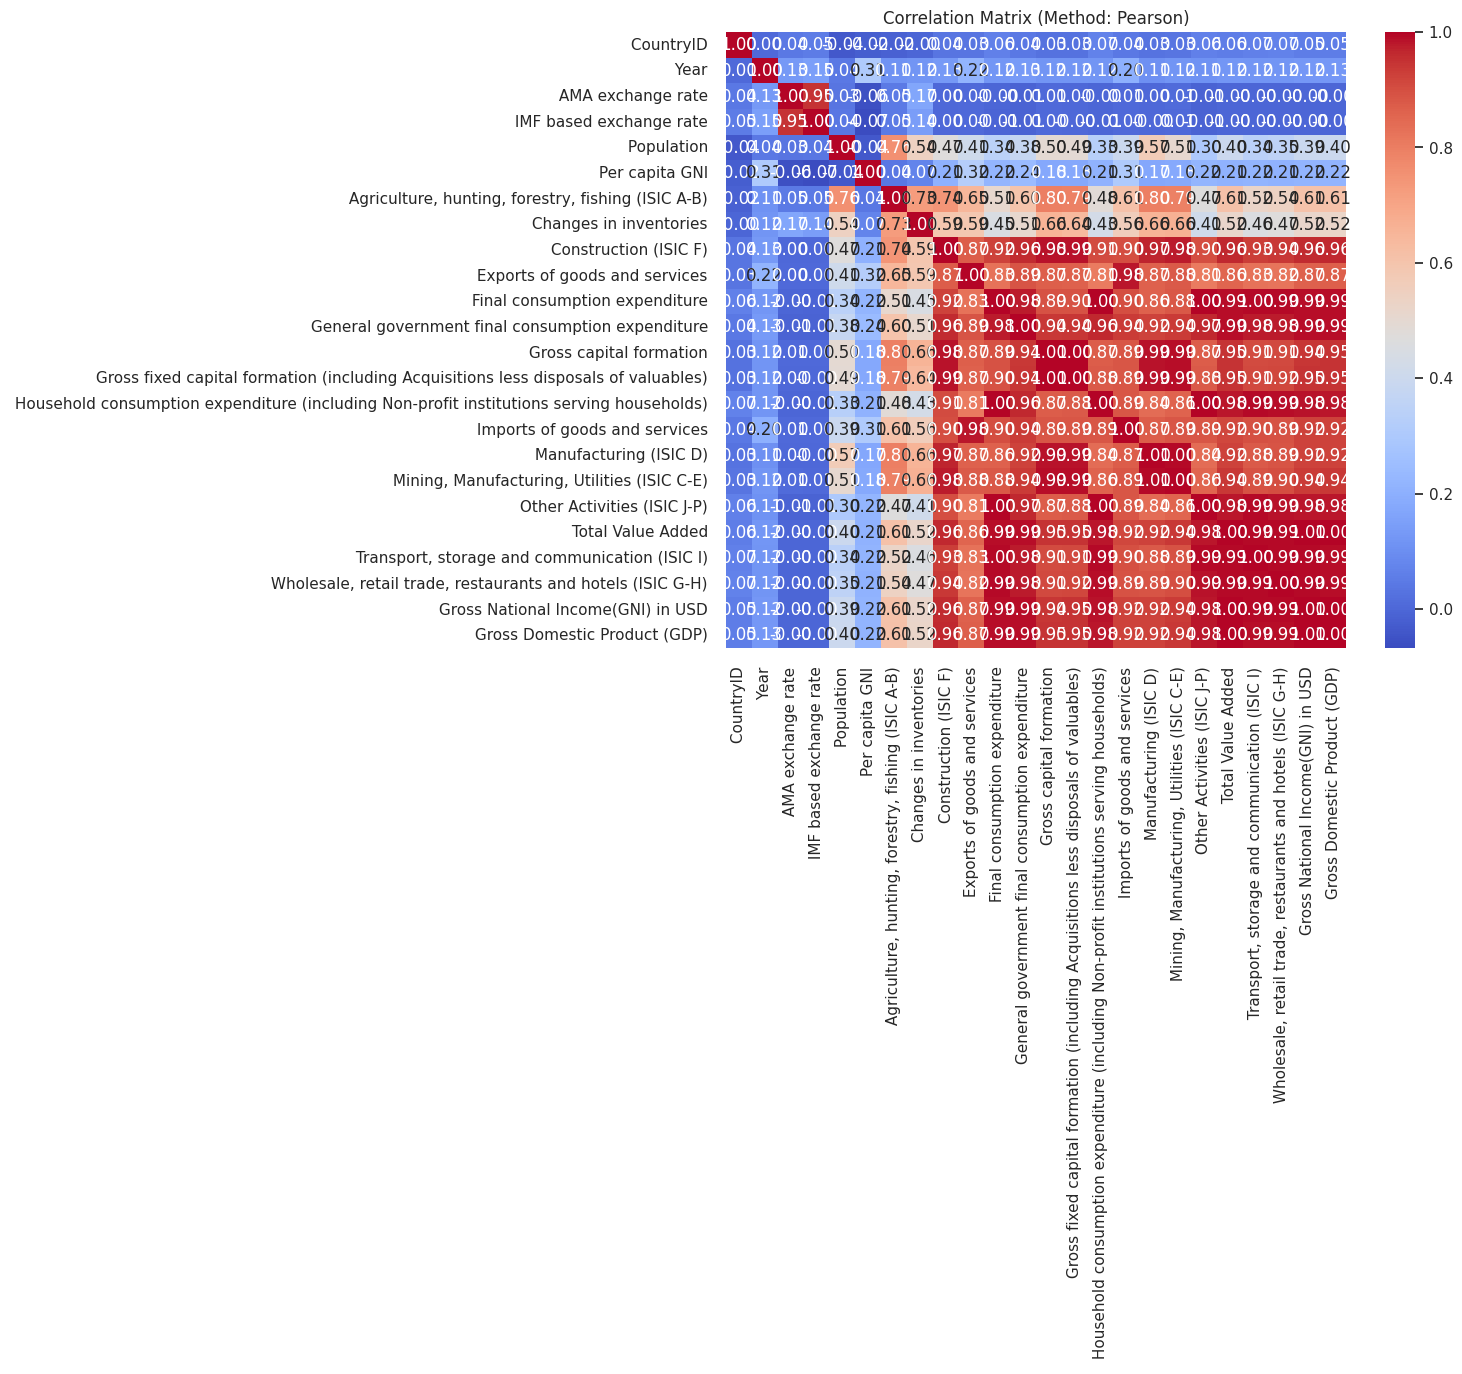

In [2]:
def plot_correlation_matrix(data, corr_method='pearson'):
    # Select only numerical columns
    numerical_data = data.select_dtypes(include='number')
    
    # Calculate the correlation matrix
    correlation_matrix = numerical_data.corr(method=corr_method)
    
    # Plot the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"Correlation Matrix (Method: {corr_method.capitalize()})")
    plt.show()


# Application
if __name__ == '__main__':
    # Load your dataset into a DataFrame
    world_stat = pd.read_csv("/kaggle/input/global-economy-indicators/Global Economy Indicators.csv")

    # Call the function to display the correlation matrix
    plot_correlation_matrix(world_stat)


<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">
    
    
The **`plot_correlation_matrix`** function,to select and plot the correlation matrix for numerical columns, can be a useful tool in Exploratory Data Analysis (EDA) for the following reasons:

- It helps in identifying and visualizing the relationships between numerical variables in your dataset. Understanding these relationships is essential for gaining insights into your data.

- It can help detect multicollinearity, which is when two or more variables are highly correlated with each other. Multicollinearity can impact the performance and interpretability of regression models.All relationships coloured in red are prime example of this from above plot. 

- When dealing with machine learning and predictive modeling, a correlation matrix can assist in feature selection by identifying which features are highly correlated with the target variable.


However, it's important to keep in mind that correlation does not imply causation, and it only measures linear or monotonic relationships. There may be nonlinear or more complex relationships that are not captured by correlation.

([Table of Contents](#-Table-of-Contents))

# **<span style='color:skyblue'>Day 16 </span><span style='color:violet'><b>:</b></span><span style='color:lightgreen'> Multi-Variate Plots</span>**

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

Writing a function that is flexible and allows you to customize the type of visualization, size, and which variables to use. This customization makes it adaptable to different datasets and research questions.Instead of writing separate code for each visualization, this function streamlines the process by providing a single interface for generating a range of common EDA plots.

By using this function as part of your EDA process, you can efficiently generate visual insights into your data, which can be crucial for making informed decisions and identifying patterns and anomalies. It can save time and help you better understand your data, which is often a critical step in the data analysis process.

    
Lets use **IRIS dataset** to implement custom visualizations   

In [3]:
#Loading the Iris Dataset
iris  = pd.read_csv("/kaggle/input/iris-flower-dataset/IRIS.csv")

In [4]:
def multivariate_viz(data, x_column, y_column, hue_column, kind="scatter", size=(6, 4)):
    plt.figure(figsize=size)

    if kind == "scatter":
        sns.scatterplot(data=data, x=x_column, y=y_column, hue=hue_column)
        plt.title(f"Scatter Plot: {x_column} vs. {y_column}")
    elif kind == "jointplot":
        sns.jointplot(data=data, x=x_column, y=y_column, height=size[1])
    elif kind == "facetgrid":
        g = sns.FacetGrid(data, hue=hue_column, height=size[1])
        g.map(plt.scatter, x_column, y_column)
        g.add_legend()
    elif kind == "boxplot":
        sns.boxplot(data=data, x=hue_column, y=y_column)
        plt.title(f"Box Plot: {x_column} vs. {y_column}")
    elif kind == "boxplot_swarm":
        ax = sns.boxplot(data=data, x=hue_column, y=y_column)
        ax = sns.stripplot(data=data, x=hue_column, y=y_column, jitter=True, edgecolor="gray")
        plt.title(f"Box Plot with Swarm Plot: {x_column} vs. {y_column}")
    elif kind == "violinplot":
        sns.violinplot(data=data, x=hue_column, y=y_column, scale="width")
        plt.title(f"Violin Plot: {x_column} vs. {y_column}")
    elif kind == "facetgrid_kde":
        g = sns.FacetGrid(data, hue=hue_column, height=size[1])
        g.map(sns.kdeplot, x_column)
        g.add_legend()
    elif kind == "pairplot":
        sns.pairplot(data, hue=hue_column, height=size[1])

    plt.show()


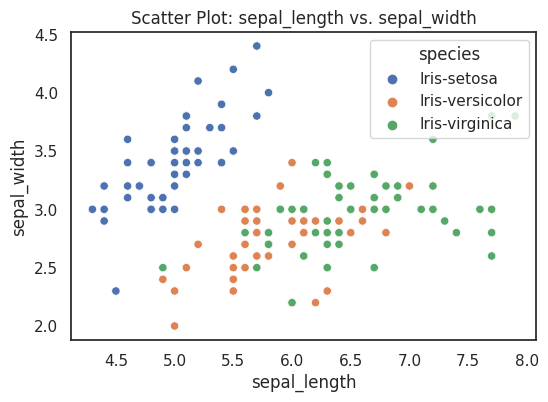

In [5]:
# Scatter Plot
multivariate_viz(iris, "sepal_length", "sepal_width", "species", kind="scatter")

<Figure size 500x500 with 0 Axes>

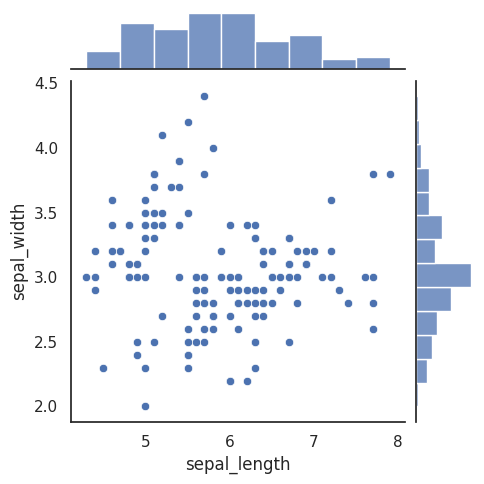

In [6]:
#Joint Plot
multivariate_viz(iris, "sepal_length", "sepal_width", "species", kind="jointplot", size=(5, 5))

<Figure size 500x500 with 0 Axes>

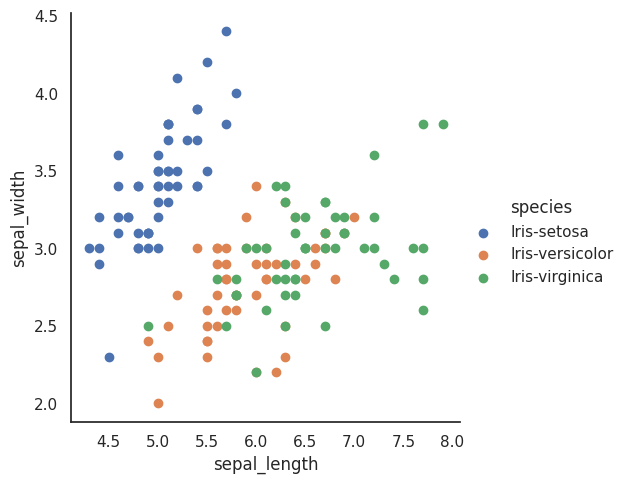

In [7]:
#Facet Grid
multivariate_viz(iris, "sepal_length", "sepal_width", "species", kind="facetgrid", size=(5, 5))

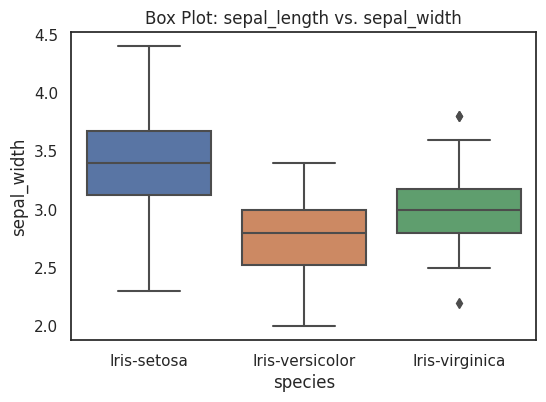

In [8]:
#Box Plot
multivariate_viz(iris, "sepal_length", "sepal_width", "species", kind="boxplot", size=(6, 4))

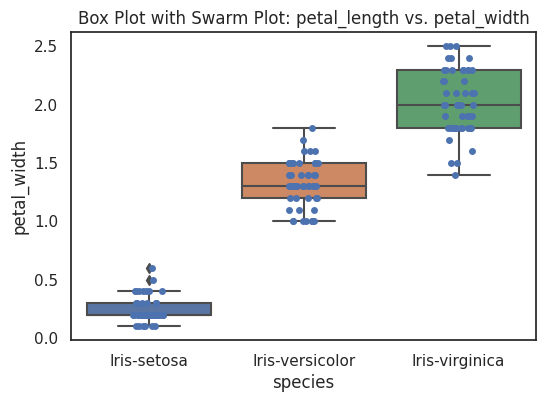

In [9]:
#Boxplot Swarm
multivariate_viz(iris, "petal_length", "petal_width", "species", kind="boxplot_swarm", size=(6, 4))

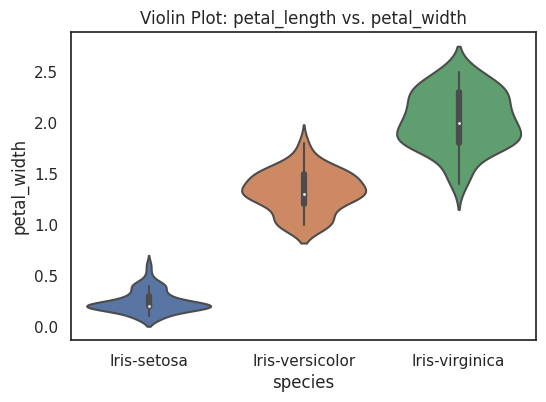

In [10]:
#Violin Plot
multivariate_viz(iris, "petal_length", "petal_width", "species", kind="violinplot", size=(6, 4))

<Figure size 600x400 with 0 Axes>

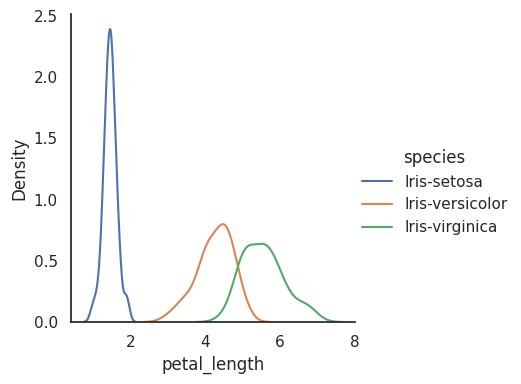

In [11]:
#Facet Grid KDE Plot
multivariate_viz(iris, "petal_length", "species", "species", kind="facetgrid_kde", size=(6, 4))

<Figure size 600x300 with 0 Axes>

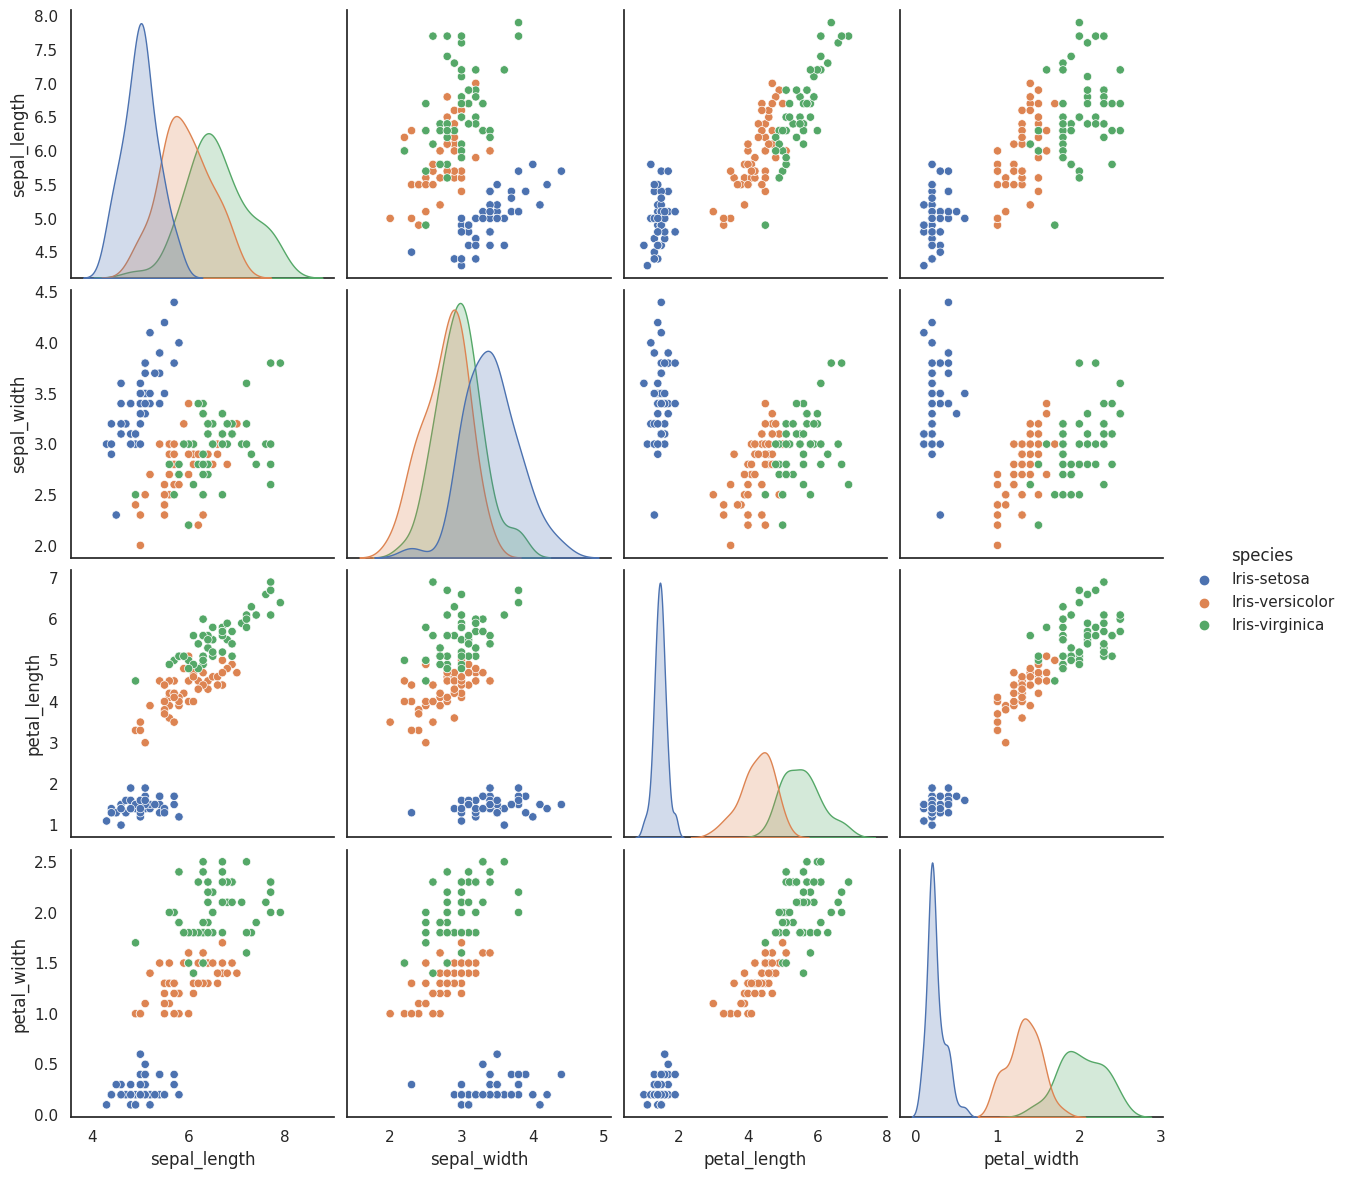

In [12]:
#Pair Plot
multivariate_viz(iris,None,None,hue_column="species", kind="pairplot", size=(6, 3))

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">
    
The **`multivariate_viz`** function can be helpful in Exploratory Data Analysis (EDA) in several ways:
    
- This function allows you to quickly generate a variety of visualizations for different combinations of columns, making it easier to explore the data visually.
- To visualize relationships between different variables. For example, scatter plots can help you understand how two numeric variables are related, while box plots and violin plots provide insights into the distribution of data.
- When dealing with categorical data, you can use this function to compare categories within a single visualization. For instance, box plots or violin plots can show how a numeric variable varies across different categories.
- Visualizations like box plots and swarm plots help in identifying outliers in the data, which are data points that deviate significantly from the majority of data points.
- The function allows you to create kernel density estimation (KDE) plots, which provide insights into the probability density function of a numeric variable. This is particularly useful for understanding the shape of the distribution.
- The pairplot functionality can generate a matrix of scatter plots for pairwise comparisons of variables. This is valuable for quickly spotting correlations and trends    

([Table of Contents](#-Table-of-Contents))

# **<span style='color:skyblue'>Day 17 </span><span style='color:violet'><b>:</b></span><span style='color:lightgreen'> Pie Charts</span>**

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

Pie charts provide a visual representation of how parts of a whole contribute to the whole. They are useful for showing the distribution or composition of a categorical variable.Listing down the scenarios where Pie charts can be very handy - 

**Market Share Analysis**: When analyzing market data, pie charts can be used to visualize the market share of different competitors or products. It helps identify the dominant players in the market.

**Budget Allocation**: In financial analysis, pie charts can represent how a budget is allocated to different expense categories. This makes it easy to see which categories consume the most significant portion of the budget.

**Survey Responses**: If you're analyzing survey data with multiple choice questions, pie charts can illustrate the distribution of responses for each question. This is particularly useful for visualizing survey results.

**Composition Analysis**: Pie charts help break down a whole into its constituent parts. For example, in demographic analysis, you can use pie charts to represent the composition of a population by age groups.
    
Let's run some Pie Charts on [**Daily Transactions Dataset**](https://www.kaggle.com/datasets/prasad22/daily-transactions-dataset)    

In [13]:
def create_pie_chart(data_frame, category_column, value_column, library='matplotlib',title="Plot"):
    categories = data_frame[category_column]
    values = data_frame[value_column]

    if library == 'matplotlib':
        plt.figure(figsize=(6, 6))
        plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=110)
        plt.title(title)
        plt.axis('equal')
        plt.show()
    elif library == 'seaborn':
        plt.figure(figsize=(6, 6))
        sns.set(style='whitegrid')
        sns.set_palette("pastel") #Viridis,inferno,magma,cividis,Set2,flare etc
        plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=140)
        plt.title(title)
        plt.axis('equal')
        plt.show()
    elif library == 'plotly':
        fig = px.pie(data_frame, names=category_column, values=value_column, title=title)
        fig.show()
    else:
        print("Invalid library choice. Please use 'matplotlib', 'seaborn', or 'plotly'.")


In [14]:
#Loading California Independent Mediacl Review Dataset
daily_finance = pd.read_csv("/kaggle/input/daily-transactions-dataset/Daily Household Transactions.csv")

#Using Function from Week I of the series
def perform_basic_eda(df):
    temp = pd.DataFrame(index=df.columns)
    temp['data_type']=df.dtypes
    temp['null_count']=df.isnull().sum()
    temp['unique_count']=df.nunique()
    return temp

perform_basic_eda(daily_finance)

,data_type,null_count,unique_count
Date,object,0,1611
Mode,object,0,12
Category,object,0,50
Subcategory,object,635,90
Note,object,521,1057
Amount,float64,0,550
Income/Expense,object,0,3
Currency,object,0,1


In [15]:
#Recalling Feture Extraction Function from Timestamp of Week I of the series
def extract_timestamp_features_in_dataframe(df, timestamp_column_name):
    # Convert the timestamp column to a datetime object
    df[timestamp_column_name] = pd.to_datetime(df[timestamp_column_name], errors='coerce')
    
    # Extract individual features
    features = {
                "second": df[timestamp_column_name].dt.second,
                "minute": df[timestamp_column_name].dt.minute,
                "hour": df[timestamp_column_name].dt.hour,
                "day": df[timestamp_column_name].dt.day,
                "month": df[timestamp_column_name].dt.month,
                "year": df[timestamp_column_name].dt.year
    }
    
    # Insert the extracted features just after the original timestamp column
    for feature_name, feature_data in features.items():
        df.insert(df.columns.get_loc(timestamp_column_name) + 1, feature_name, feature_data)
        
    # Define a dictionary to map numeric months to month abbreviations
    month_map = {
        1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
        5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
        9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
    }

    # Use the map function to replace numeric months with month abbreviations
    df['month'] = df['month'].map(month_map)
    
       
    return df


daily_finance = extract_timestamp_features_in_dataframe(daily_finance,"Date")
daily_finance.columns.values

array(['Date', 'year', 'month', 'day', 'hour', 'minute', 'second', 'Mode',
       'Category', 'Subcategory', 'Note', 'Amount', 'Income/Expense',
       'Currency'], dtype=object)

In [16]:
#Using another Function from Week I of the series
def proportions(df, column_name):
    absolute_dist = df[column_name].value_counts(dropna=False).reset_index()
    absolute_dist = absolute_dist.rename({"index":column_name,column_name:"count"},axis=1) 
    percent_dist = df[column_name].value_counts(dropna=False,normalize=True).round(3)*100
    percent_dist = percent_dist.reset_index()
    percent_dist = percent_dist.rename({"index":column_name,column_name:"proportion"},axis=1)
    freq_dist = absolute_dist.merge(percent_dist,on=column_name,how="left")
    freq_dist["proportion"] = freq_dist["proportion"].apply(lambda x : str(x)+" %")
    return freq_dist

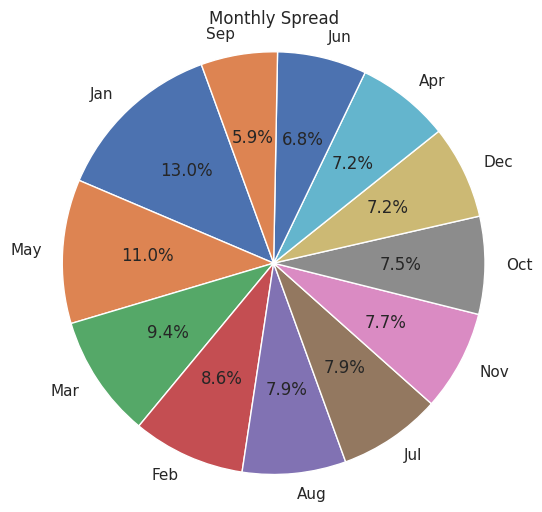

In [17]:
monthly_spread = proportions(daily_finance,"month")
create_pie_chart(monthly_spread, 'month', 'count', library='matplotlib',title="Monthly Spread") 

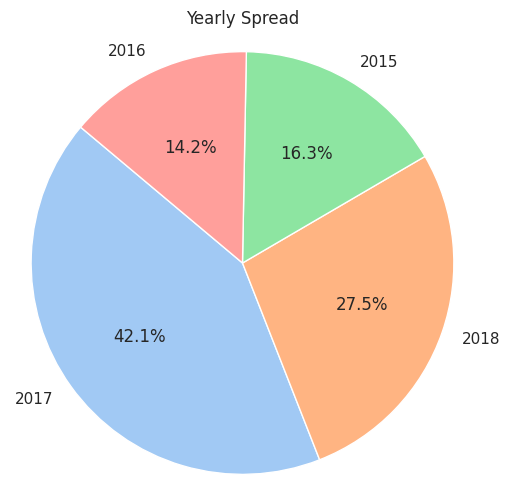

In [18]:
yearly_spread = proportions(daily_finance,"year")
create_pie_chart(yearly_spread, 'year', 'count', library='seaborn',title="Yearly Spread") 

In [19]:
oct_category_spread = proportions(daily_finance[daily_finance["month"]=="Oct"],"Category")
create_pie_chart(oct_category_spread, 'Category', 'count', library='plotly',title="Category Spread In October") 

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">


While pie charts have their uses, it's essential to be mindful of their limitations:

**Limited Categories**: Pie charts work best when there are only a few categories to display. When you have many categories, a bar chart may be a better choice.

**Avoid 3D and Exploded Pies**: Avoid 3D effects or exploded slices as they can distort the perception of relative sizes.

**Use Labels**: Always label the slices to make it clear what each category represents.

In summary, pie charts can be a valuable tool in EDA for exploring the distribution of categorical data. However, it's crucial to choose the right visualization method depending on the specific context and the data you're working with.
    
    

([Table of Contents](#-Table-of-Contents))

# **<span style='color:skyblue'>Day 18 </span><span style='color:violet'><b>:</b></span><span style='color:lightgreen'> Bar Graphs</span>**

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">
    
Writing a custom function to plot a bar graph for numerical or categorical columns.

In [20]:
def create_bar_charts(data, columns, figsize=(15, 6)):
    # Create subplots
    num_columns = len(columns)
    fig, axs = plt.subplots(1, num_columns, figsize=figsize)
    
    cmap = plt.cm.get_cmap('cool')
    
    for i, col in enumerate(columns):
        if pd.api.types.is_numeric_dtype(data[col]):
            # If the column is numeric, create a histogram
            axs[i].hist(data[col], color=cmap(i/num_columns), bins=20)
            axs[i].set_title(f'Histogram of {col}')
            axs[i].set_xlabel(col)
            axs[i].set_ylabel('Frequency')
        else:
            # If the column is categorical, create a bar chart
            counts = data[col].value_counts()
            total_rows = len(data)
            percent = counts / total_rows * 100
            axs[i].bar(counts.index, counts.values, color=cmap(i/num_columns))
            axs[i].set_title(f'Bar Chart of {col}')
            axs[i].set_xlabel(col)
            axs[i].set_ylabel('Frequency')
            plt.setp(axs[i].get_xticklabels(), rotation=45, ha='right')
            for j, count in enumerate(counts):
                pct = percent[j]
                axs[i].text(counts.index[j], count + 0.02 * total_rows, f'{count}\n{pct:.2f}%', ha='center', va='top')
    
    plt.show()

In [21]:
#Loading California Independent Medical Review Dataset
ca_med_rev = pd.read_csv("/kaggle/input/ca-independent-medical-review/Independent_Medical_Review__IMR__Determinations__Trend.csv")
perform_basic_eda(ca_med_rev)

,data_type,null_count,unique_count
Reference ID,object,0,19245
Report Year,int64,0,16
Diagnosis Category,object,59,29
Diagnosis Sub Category,object,1904,278
Treatment Category,object,450,31
Treatment Sub Category,object,1268,283
Determination,object,0,2
Type,object,0,3
Age Range,object,1210,7
Patient Gender,object,1210,2


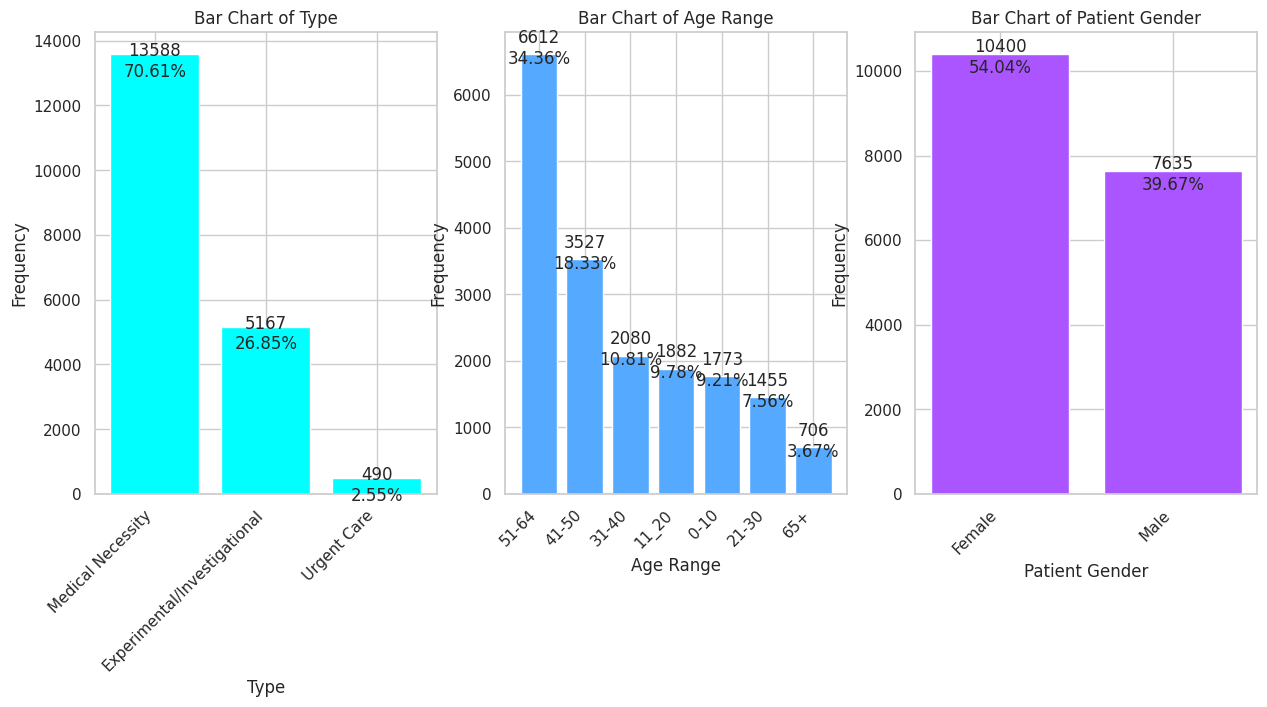

In [22]:
create_bar_charts(ca_med_rev, ["Type", "Age Range", "Patient Gender"])

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">
    
Multiple bar charts with percentage and absolute numbers on tip of bars for quick reference.

([Table of Contents](#-Table-of-Contents))

# **<span style='color:skyblue'>Day 19 </span><span style='color:violet'><b>:</b></span><span style='color:lightgreen'> Radar Chart</span>**

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">
    
Radar charts aka Spider Charts are often useful for Multivariate Visualization,Identifying Patterns, Comparative Analysis and Outlier Detection etc.
    
Lets apply Radar charts on [**Daily Transactions Dataset**](https://www.kaggle.com/datasets/prasad22/daily-transactions-dataset)  and [**Constitutions Dataset**](https://www.kaggle.com/datasets/prasad22/constitution-dataset)      

In [23]:
data = daily_finance[(daily_finance["year"]==2018) & (daily_finance["Income/Expense"]=="Expense")].groupby(["month","Category"])["Amount"].sum().reset_index()
data

,month,Category,Amount
0,Apr,Apparel,63.0
1,Apr,Beauty,50.0
2,Apr,Documents,50.0
3,Apr,Education,21.0
4,Apr,Family,2825.0
...,...,...,...
100,Sep,Festivals,251.0
101,Sep,Food,452.0
102,Sep,Other,83.0
103,Sep,Transportation,480.0


In [24]:
def plot_radar_charts(df, cat_col=None, val_col=None, months=None):
    for month in months:
        data_month = df[df["month"] == month].copy()
        fig = px.line_polar(data_month, r=val_col, theta=cat_col, line_close=True)
        fig.update_traces(fill='toself')
        fig.show()

In [25]:
months_to_plot = ["Jun"]  # Add the months you want to plot

plot_radar_charts(data, val_col="Amount", cat_col="Category", months=months_to_plot)


In [26]:
#Loading Constitution Dataset
constitutions = pd.read_csv("/kaggle/input/constitution-dataset/Constitution Dataset.csv")
constitutions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                190 non-null    object 
 1   Year Enacted           190 non-null    int64  
 2   Scope                  190 non-null    float64
 3   Length (in Words)      190 non-null    object 
 4   Executive Power        190 non-null    int64  
 5   Legislative Power      190 non-null    float64
 6   Judicial Independence  190 non-null    int64  
 7   Number of Rights       190 non-null    int64  
 8   Preamble               159 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 13.5+ KB


In [27]:
constitutions["Length (in Words)"] = constitutions["Length (in Words)"].str.replace(',', '').astype(int)
constitutions = constitutions.sort_values(["Length (in Words)"]).sample(10)
constitutions = constitutions[["Country","Length (in Words)"]]
constitutions = constitutions.rename({"Length (in Words)":"Length"},axis=1)
constitutions

,Country,Length
0,Afghanistan,10227
180,Ukraine,19299
106,Marshall Islands,21429
144,Sao Tome and Principe,7988
5,Antigua and Barbuda,38464
187,Vietnam,11344
170,Timor,15307
56,Ethiopia,13630
163,Sweden,13635
45,Czech Republic,14580


In [28]:
fig = px.line_polar(constitutions, r="Length", theta="Country", line_close=True)
fig.update_traces(fill='toself')
fig.show()

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">
    
However, it's important to note that radar charts also have limitations. They are best suited for a specific type of data and can become less effective when dealing with a large number of variables or when the data is highly dimensional. In some cases, alternative visualization methods, such as bar charts, scatter plots, or heatmaps, may be more appropriate for EDA. The choice of visualization depends on the nature of the data and the specific analysis goals.

([Table of Contents](#-Table-of-Contents))

# **<span style='color:skyblue'>Day 20 </span><span style='color:violet'><b>:</b></span><span style='color:lightgreen'> Animated Plot</span>**

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">
    
Animated Plots are interesting and quick way of visualizing data at a glance and see movement of variables of interet across time.
    
Lets apply animated plot on [**Global Economy Indicators**](https://www.kaggle.com/datasets/prasad22/global-economy-indicators)    
 

In [29]:
#Loading Global Economy Indicators Dataset
global_fin_indicators = pd.read_csv("/kaggle/input/global-economy-indicators/Global Economy Indicators.csv")

#Reducing the magnitude of the column to visualize better
global_fin_indicators[' Gross National Income(GNI) in Million USD '] = global_fin_indicators[' Gross National Income(GNI) in USD ']/10**6

#Selecting subset of countries to plot animated graph
pc_gni_g16 = pd.pivot_table(global_fin_indicators[global_fin_indicators[" Country "].isin([' Argentina ',' Australia ',' Brazil ',' Canada ',
                                                         ' China ',' France ',' Italy ',' Japan ',
                                                         ' Republic of Korea ',' Mexico ',' Russian Federation ',
                                                         ' Saudi Arabia ',' South Africa ',
                                           ' Türkiye ',' United Kingdom ', ' United States '])],
                            values=' Gross National Income(GNI) in Million USD ', 
                            index=[' Year '],
                           columns=[' Country '], 
                            aggfunc='sum', 
                            fill_value=0)

# Find columns with zero sum
zero_sum_cols = pc_gni_g16.columns[pc_gni_g16.sum() == 0]
# Drop columns with zero sum
pc_gni_g16 = pc_gni_g16.drop(zero_sum_cols, axis=1)

In [30]:
#Plotting Animated Bar Chart

bcr.bar_chart_race(df = pc_gni_g16, 
                   n_bars = 16, 
                   sort='desc',
                   title='Gross National Income(GNI) in Million USD',
                   dpi=100,
                   steps_per_period=1,
                   period_length=1000)

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">
    
Racing bar charts and animated plots can be valuable tools in EDA when used in the right context. They are best suited for scenarios where you want to emphasize changes over time, rankings, or competition. However, it's essential to consider the complexity of your data, the need for interactivity, and the clarity of the message you want to convey when deciding whether to use animated plots in your analysis.

([Table of Contents](#-Table-of-Contents))

# **<span style='color:skyblue'>Day 21 </span><span style='color:violet'><b>:</b></span><span style='color:lightgreen'> Scatter Plot</span>**

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">
    
We did created scatter plot when we covered multivariate plots. This is just another variant for scatter plot. 
    
Scatter plots are a valuable tool for exploratory data analysis and hypothesis generation. They provide a clear and intuitive way to examine relationships between variables, identify patterns, and make data-driven decisions.

Let's explore a scatter plot using the **Iris dataset**. This example demonstrates color and marker mapping with basic plot elements. The chart shows correlation between body mass and flipper length for three different penguin species.    

In [31]:
def create_scatter_plot(data_df, x_column, y_column, legend_column, title="", x_label="", y_label="", markers=None, colors=None, legend_title=""):
    if markers is None:
        markers = ['hex', 'circle_x', 'triangle']
    
    p = figure(title=title, background_fill_color="#fafafa")
    p.xaxis.axis_label = x_label
    p.yaxis.axis_label = y_label

    source = ColumnDataSource(data_df)

    p.scatter(x_column, y_column, source=source,
              legend_group=legend_column, fill_alpha=0.4, size=12,
              marker=factor_mark(legend_column, markers, data_df[legend_column].unique()),
              color=factor_cmap(legend_column, 'Category10_3', data_df[legend_column].unique()))

    p.legend.location = "top_left"
    p.legend.title = legend_title
    show(p)
    
from bokeh.io import output_notebook
output_notebook()    

Loading BokehJS ...

In [32]:
#Applying Scatter plot on Iris Dataset 
create_scatter_plot(iris, "sepal_length", "petal_length", "species",
                    title="Iris Data", y_label="Petal Length",
                    x_label="Sepal length", legend_title="Species")

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">
    
Hope you've liked the visualization and got more ideas as to in what various ways EDA can be done! 

([Table of Contents](#-Table-of-Contents))

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">
    

 This marks the end to this Kernel. If you find it interesting, do continue to Next Part - **30 days of EDA - Week IV** 
    
<h2>Thanks for reading!</h2>     